# [Muscle-BIDS](https://muscle-bids.github.io/) MedicalVolume class tests
[Muscle-BIDS](https://muscle-bids.github.io/) for simple medical image data loading, manipulation and visualization. Without convertion to NIfTI format or creation of the directory structure predifined by muscle-BIDS.

- By: [Gianluca Iori](https://github.com/gianthk), Francesco Chiumento
- Code license: MIT
- Narrative license: CC-BY-NC-SA

---
# Aims

- Demonstrate the use of the MedicalVolume class contained in [muscle-bids](https://github.com/muscle-bids/muscle-bids/tree/main) (also in [pyvoxel](https://github.com/pyvoxel/pyvoxel)) for common data handling, image manipulation and processing tasks.
- Methods / tasks tested:
    - [X] DCM load
    - [X] SimpleITK conversion
    - [X] Crop / subvolume
    - [X] View with `napari.viewer()`
    - [ ] `reformat`
    - [X] Some metadata getters

---

# Computational workflow

- Installations:  
    - The [`h5py`](https://docs.h5py.org/en/stable/) module is required to run this notebook
    - For ITK tests ([Section 2](#2.-Convert-to-SimpleITK)) you will neet to install [simpleITK](https://simpleitk.org/)
    - For ([Section 3](#3.-Visualize-with-napari)) you will need to install [napari](https://napari.org/stable/tutorials/fundamentals/installation.html#installation)

### Imports

In [1]:
from muscle_bids.utils.io import load_dicom

- Optional imports:

In [2]:
import napari

### 1. Load dicom file to MedicalVolume object

In [3]:
# mv = load_dicom('/home/gianthk/PycharmProjects/muscle-bids/dicom')
mv = load_dicom('/home/gianthk/Data/demo_v2/outputs/original/01/DESS/01')

Take a look at the loaded MedicalVolume object

In [3]:
mv

MedicalVolume(
  shape=(512, 512, 80),
  ornt=('SI', 'AP', 'LR')),
  spacing=(0.3125, 0.3125, 1.5),
  origin=(-13.0848, 68.3588, 79.8372),
  device=Device(type='cpu')
)

#### 1.1. Crop volume
To create a separate subvolume you can do the following. Metadata will be sliced appropriately.

In [ ]:
mv_subvolume = mv[50:90, 50:90, 30:70]

### 2. Convert to SimpleITK

In [4]:
mv_itk = mv.to_sitk()

Inspect ITK image contents:

In [5]:
print(mv_itk)

Image (0x2cf2d80)
  RTTI typeinfo:   itk::Image<short, 3u>
  Reference Count: 1
  Modified Time: 1625
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 0
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 80]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 80]
  RequestedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 80]
  Spacing: [0.3125, 0.3125, 1.5]
  Origin: [13.0848, -68.3588, 79.8372]
  Direction: 
-0 0 -1
0 1 0
-1 0 0

  IndexToPointMatrix: 
0 0 -1.5
0 0.3125 0
-0.3125 0 0

  PointToIndexMatrix: 
0 0 -3.2
0 3.2 0
-0.666667 0 0

  Inverse Direction: 
0 0 -1
0 1 0
-1 0 0

  PixelContainer: 
    ImportImageContainer (0x2be2e40)
      RTTI typeinfo:   itk::ImportImageContainer<unsigned long, short>
      Reference Count: 

### 3. Visualize with napari
Take a look at [`napari`](https://napari.org/stable/api/napari.html)'s manual for more info.
You can launch the napari viewer with:

In [ ]:
viewer = napari.view_image(mv.volume,
                          scale=mv.pixel_spacing)

In [4]:
from napari.utils import nbscreenshot

/home/gianthk/anaconda3/envs/bids-test/lib/python3.9/site-packages/napari/utils/notebook_display.py:80: UserWarning: The lxml library is not installed, and is required to sanitize alt text for napari screenshots. Alt-text will be stripped altogether without lxml.
  warn(


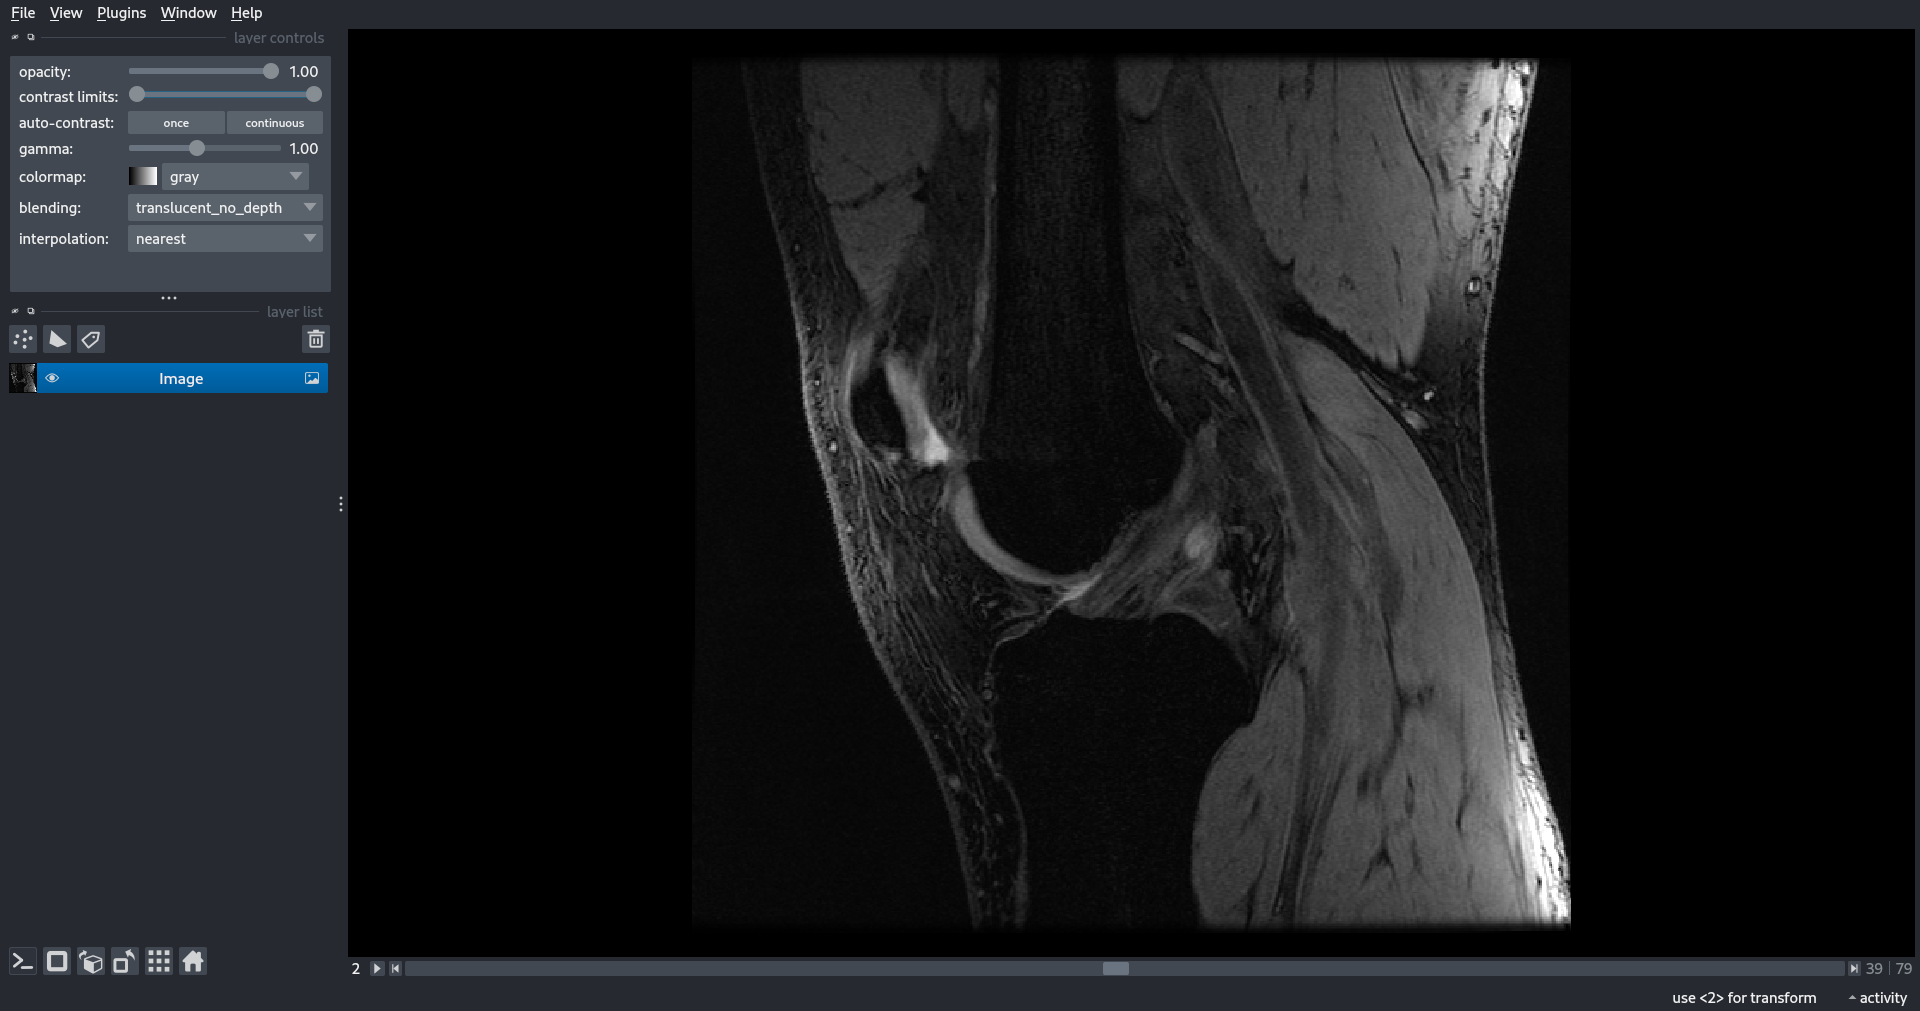

In [6]:
nbscreenshot(viewer, alt_text="MRI DICOM data visualized with napari")

### 4. Getter functions
Some methods to access common metadata
#### 4.1. Pixel spacing

In [14]:
print(mv.pixel_spacing)

(0.3125, 0.3125, 1.5)


#### 4.2. Pixel format

In [7]:
print(mv.volume.dtype)

int16


#### 4.3. Origin

In [16]:
print(mv.scanner_origin)

(-13.0848, 68.3588, 79.8372)


#### 4.4. Orientation

In [17]:
print(mv.orientation)

('SI', 'AP', 'LR')


---
# Dependencies

In [3]:
%load_ext watermark

%watermark
%watermark --iversions

Last updated: 2024-01-16T16:12:28.235237+01:00

Python implementation: CPython
Python version       : 3.9.18
IPython version      : 8.18.1

Compiler    : GCC 12.3.0
OS          : Linux
Release     : 6.1.0-17-amd64
Machine     : x86_64
Processor   : 
CPU cores   : 8
Architecture: 64bit

napari: 0.4.18
sys   : 3.9.18 | packaged by conda-forge | (main, Dec 23 2023, 16:33:10) 
[GCC 12.3.0]



---
<a name="thanks"></a>
# Acknowledgements

- This notebook was developed within Building the workshop [Sharing and Curating Open Data in Musculoskeletal Imaging Research](https://github.com/ORMIRcommunity/2024_2nd_ORMIR_WS) organized by the [ORMIR community](https://ormircommunity.github.io/)
- Main financial support by the [Swiss National Science Foundation (SNSF)](https://www.snf.ch/en)   
Sponsors: [Balgrist Campus](https://www.balgristcampus.ch/), [Schulthess Klinik](https://www.schulthess-klinik.ch/en), [Zurich Tourism Office](https://www.zuerich.com/en)

---
<a name="attribution"></a>

Notebook created using the [template](https://github.com/ORMIRcommunity/templates/blob/main/ORMIR_nb_template.ipynb) of the [ORMIR community](https://ormircommunity.github.io/) (version 1.0, 2023)